In [1]:
#Importing all the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#loading the data monthwise
#we have data from april14 to sep14
apr14 = pd.read_csv('apr14.csv')
may14 = pd.read_csv('may14.csv')
jun14 = pd.read_csv('jun14.csv')
jul14 = pd.read_csv('jul14.csv')
aug14 = pd.read_csv('aug14.csv')
sep14 = pd.read_csv('sep14.csv')


In [3]:
#making copies of the data for analysis
apr,may,jun,jul,aug,sep = apr14,may14,jun14,jul14,aug14,sep14


In [4]:
#for checking how data is organized
print(apr.head())
apr.info()

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


### Making Barplots Number of Trips VS Months

checking how many trips done in different month from apr to sep

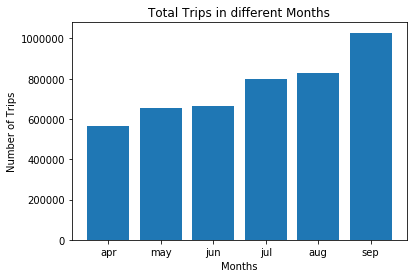

In [40]:
X = [apr,may,jun,jul,aug,sep]
Y = [len(i) for i in X]
X = ['apr','may','jun','jul','aug','sep']

plt.bar(X,Y, align='center')
plt.title('Total Trips in different Months')
plt.xlabel('Months')
plt.ylabel('Number of Trips')
plt.show()

## Data Preprocessing 

First converting Date/Time column into datetime Timestamp. Then seperating day, hour, month and weekday from the timestamp.

In [6]:
final = pd.concat([apr,may,jun,jul,aug,sep],ignore_index=True)
final['Date/Time'] = pd.to_datetime(final['Date/Time'])
final = final.drop(['Lat','Lon'],axis=1)

day = []
hour = []
Month = []
weekday = []
for i in range(len(final)):
    x = final['Date/Time'][i]
    day.append(x.day)
    hour.append(x.hour)
    Month.append(x.month)
    weekday.append(x.weekday())
final['day'] = day
final['month'] = Month
final['hour'] = hour
final['weekday'] = weekday

# Making Different Graphs

First we are seperating our data into month and then by weekday using groupby method. Now we are doing this same method for all the graphs.

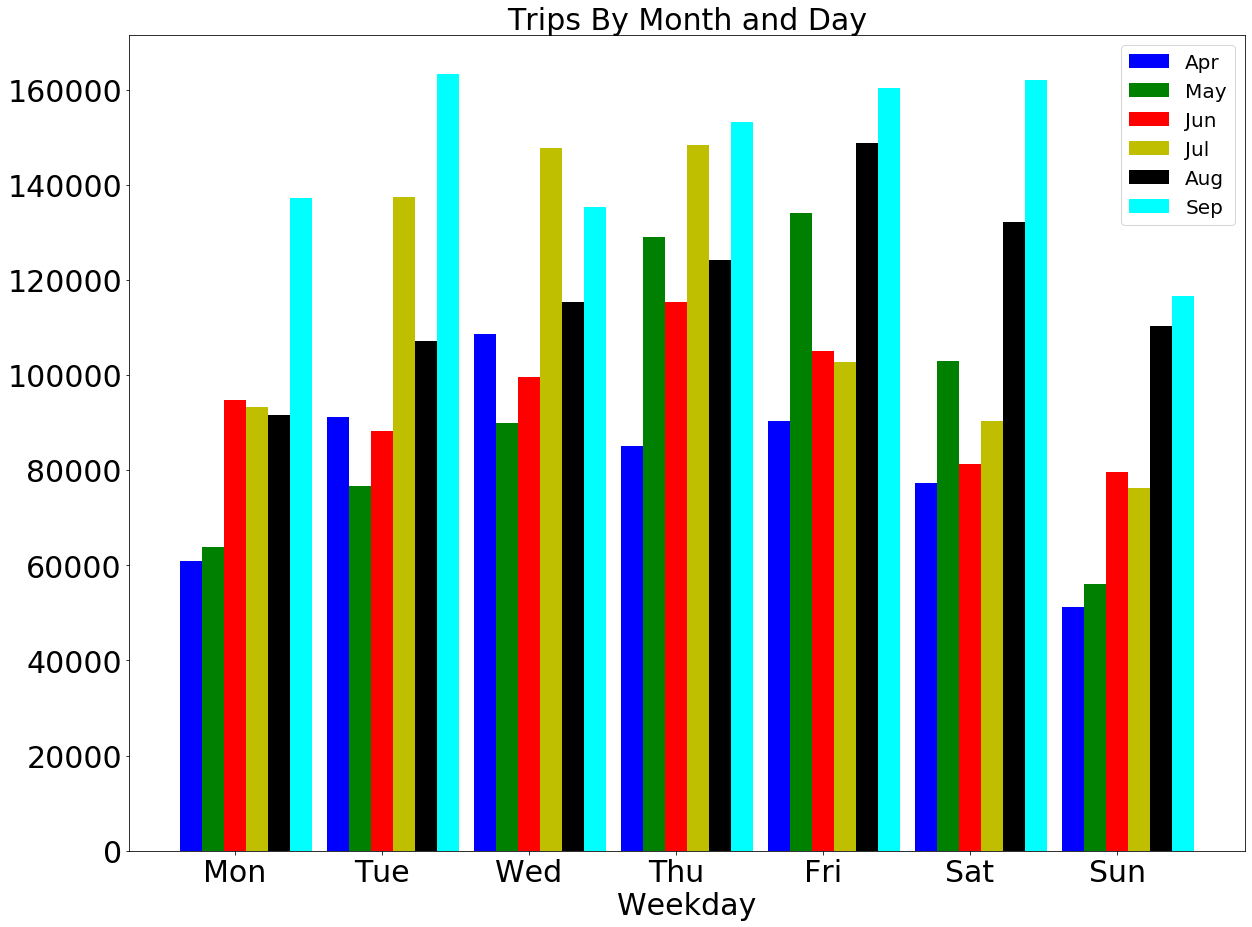

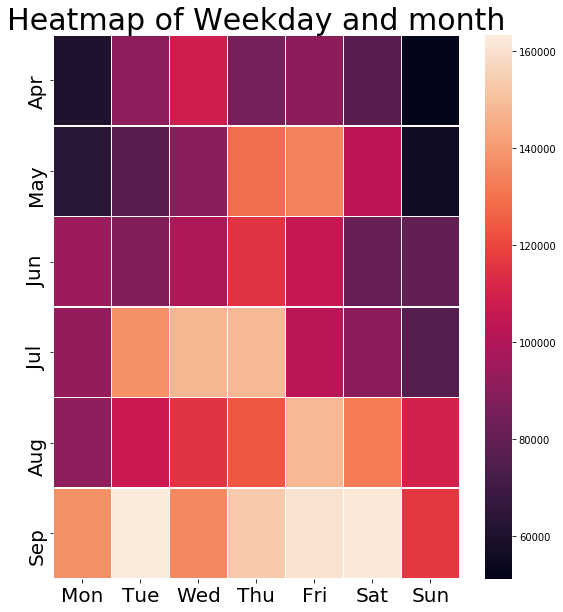

In [38]:
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
month = ['Apr','May','Jun','Jul','Aug','Sep']
y = [len(final.groupby(['month']).get_group(i).groupby(['weekday']).get_group(j)) for i in range(4,10) for j in range(7) ]

y = np.reshape(y,(6,7))
Y = y.T

x = np.array([1,2,3,4,5,6,7])
plt.figure(figsize=(20,15))
plt.bar(x-0.30, y[0], width=0.15, color='b', align='center')
plt.bar(x-0.15, y[1], width=0.15, color='g', align='center')
plt.bar(x, y[2], width=0.15, color='r', align='center')
plt.bar(x+0.15,y[3], width=0.15, color='y', align='center')
plt.bar(x+0.30,y[4], width=0.15, color='black', align='center')
plt.bar(x+0.45,y[5], width=0.15, color='cyan', align='center')
plt.yticks(size=30)
plt.xticks(x,weekday,size=30) #xticks display value on our x-axis li
#Legend is for displaying what color show what month in this particular graph
plt.legend(month,ncol = 1,fontsize=20) #ncol=n for displaying our legend into to n number of columns
plt.title('Trips By Month and Day',size=30)
plt.xlabel('Weekday',size=30)
plt.show()
plt.figure(figsize=(20,10))
ax=plt.subplot(122)
plt.title('Heatmap of Weekday and month',size=30)
plt.ylabel('Month',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Weekday',size=30)

sns.heatmap(y,xticklabels=weekday, yticklabels=month,linewidths=.5,ax = ax)

plt.show()

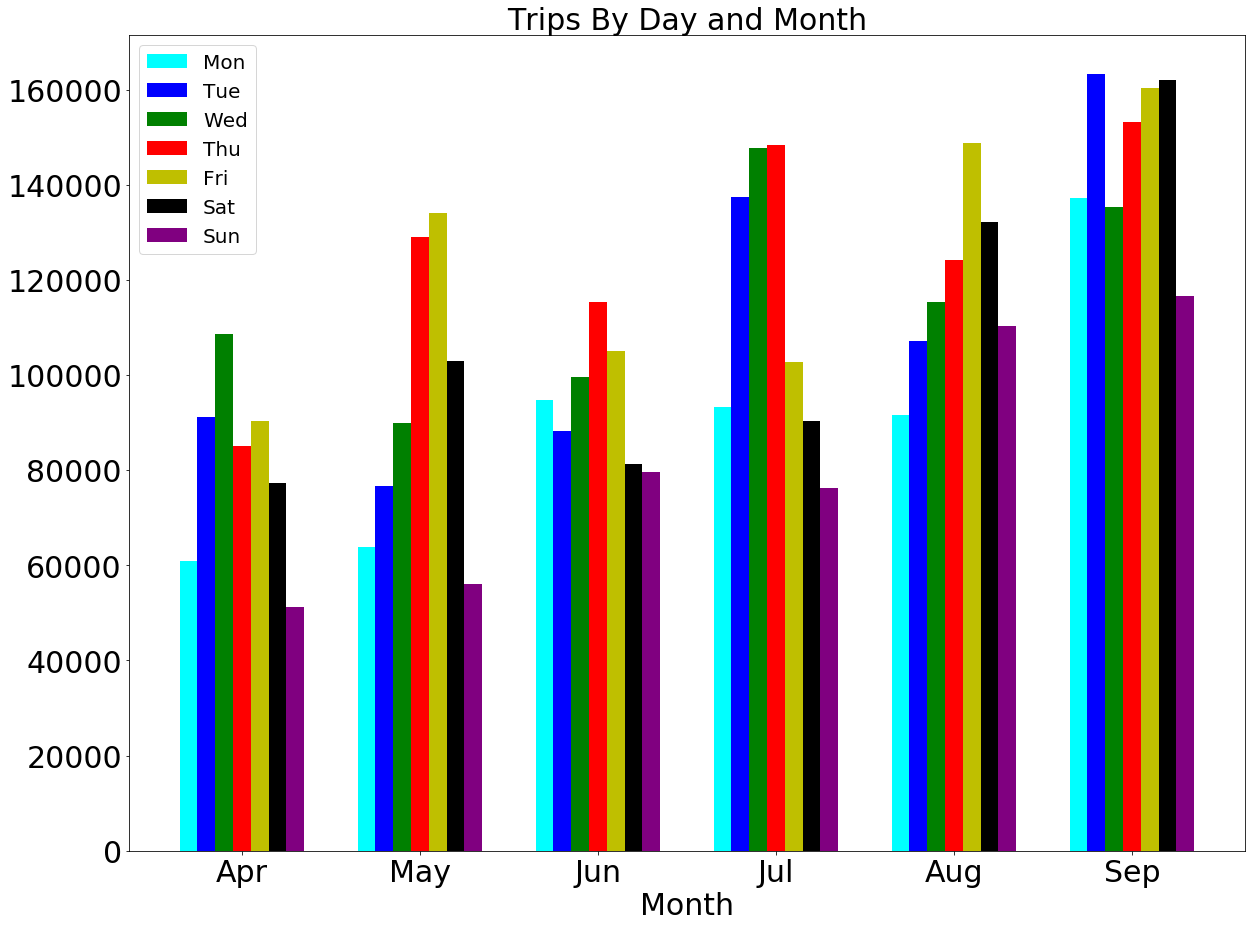

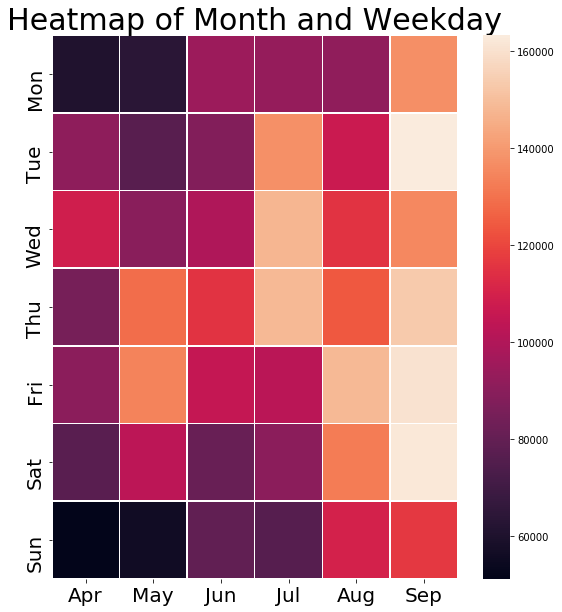

In [39]:
x = np.array([1,2,3,4,5,6])
plt.figure(figsize=(20,15))
plt.bar(x-0.3,Y[0], width=0.1, color='cyan', align='center')
plt.bar(x-0.2, Y[1], width=0.1, color='b', align='center')
plt.bar(x-0.1, Y[2], width=0.1, color='g', align='center')
plt.bar(x, Y[3], width=0.1, color='r', align='center')
plt.bar(x+0.1,Y[4], width=0.1, color='y', align='center')
plt.bar(x+0.2,Y[5], width=0.1, color='black', align='center')
plt.bar(x+0.3,Y[6], width=0.1, color='purple', align='center')
plt.yticks(size=30)
plt.xticks(x,month,size=30)
plt.legend(weekday,ncol = 1,fontsize=20)
plt.title('Trips By Day and Month',size=30)
plt.xlabel('Month',size=30)
plt.show()

plt.figure(figsize=(20,10))
ax=plt.subplot(122)
plt.title('Heatmap of Month and Weekday',size=30)
plt.ylabel('Weekday',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Month',size=30)
sns.heatmap(Y,xticklabels=month, yticklabels=weekday,linewidths=.5,ax=ax)
plt.show()

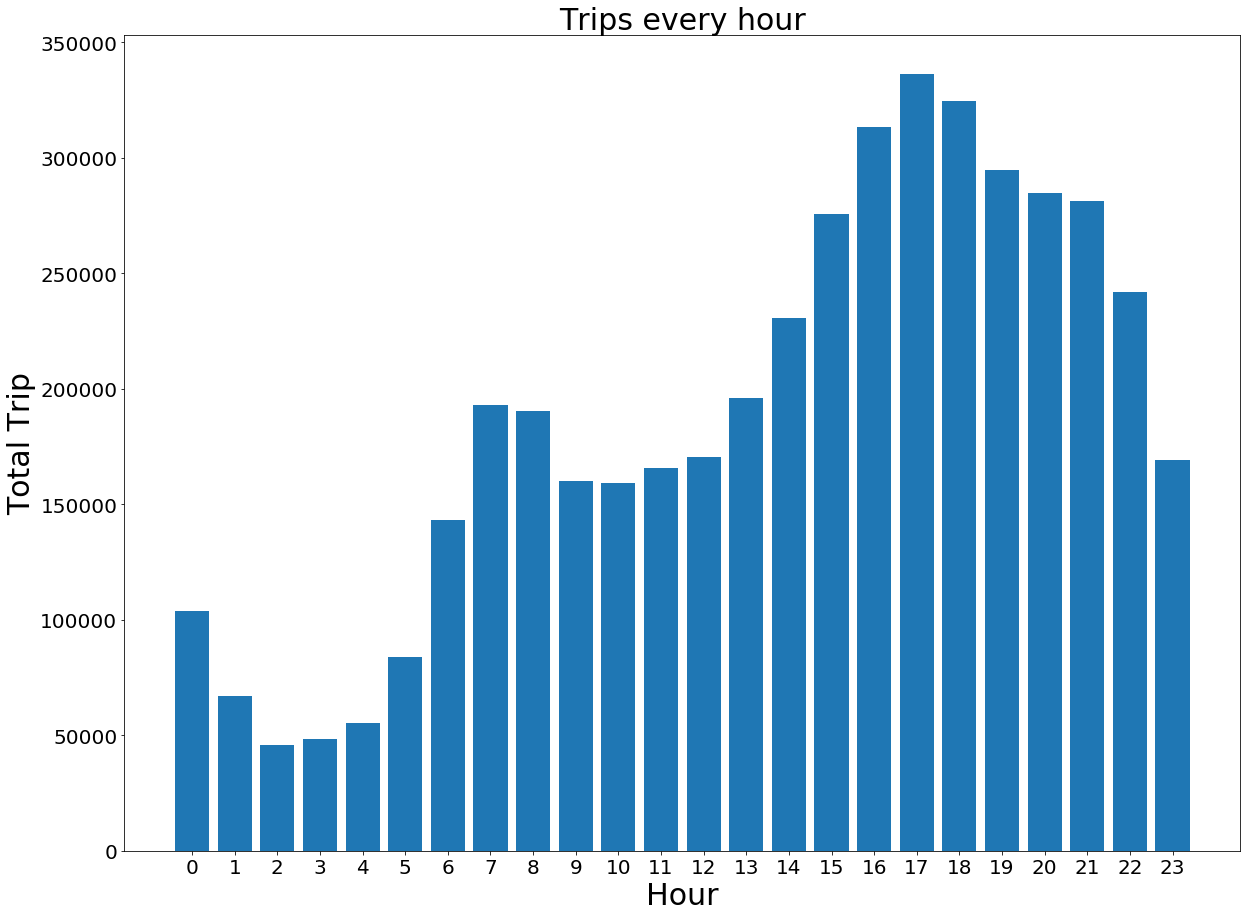

In [31]:
y = [len(final.groupby(['month']).get_group(i).groupby(['hour']).get_group(j)) for i in range(4,10) for j in range(24) ]
y = np.reshape(y,(6,24))
Y = y.sum(axis=0)
X = np.array(range(24))

plt.figure(figsize=(20,15))
plt.bar(X,Y)
plt.yticks(size=20)
plt.xticks(range(24),size=20)
plt.xlabel('Hour',size=30)
plt.ylabel('Total Trip',size=30)
plt.title('Trips every hour',size=30)
plt.show()

Here we are appending value so we are summing all the previous value(Variable x1)

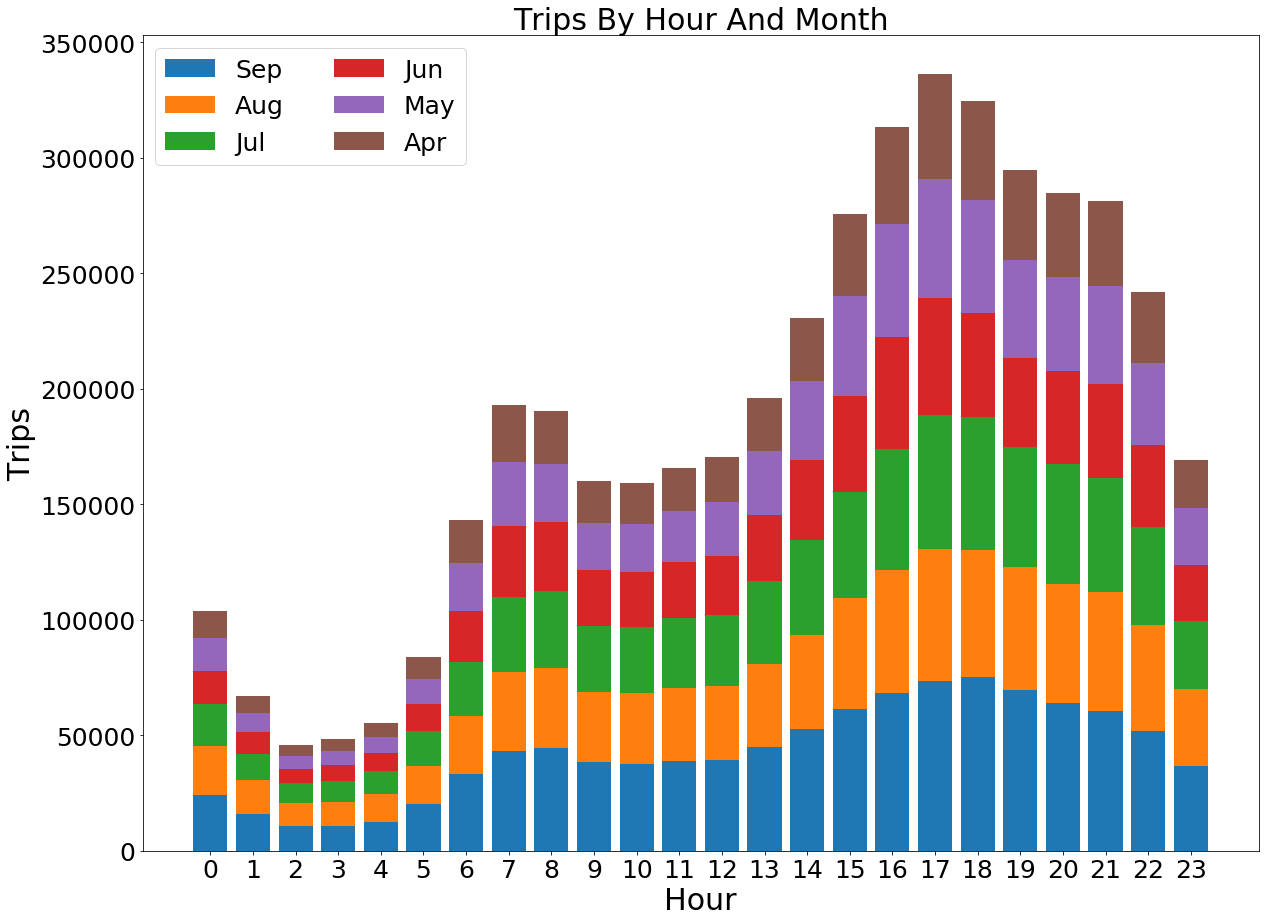

In [32]:
x = np.array(range(24))
plt.figure(figsize=(20,15))
plt.bar(x, y[5], 0.8)
plt.bar(x,y[4],0.8,bottom=y[5])
x1=y[4]+y[5]
plt.bar(x,y[3],0.8,bottom=x1)
x1+=y[3]
plt.bar(x,y[2],0.8,bottom=x1)
x1+=y[2]
plt.bar(x,y[1],0.8,bottom=x1)
x1+=y[1]
plt.bar(x,y[0],0.8,bottom=x1)
plt.legend(['Sep','Aug','Jul','Jun','May','Apr'],ncol=2,fontsize=25)
plt.xticks(range(24),size=25)
plt.yticks(size=25)
plt.xlabel('Hour',size=30)
plt.ylabel('Trips',size=30)
plt.title('Trips By Hour And Month',size=30)
plt.show()


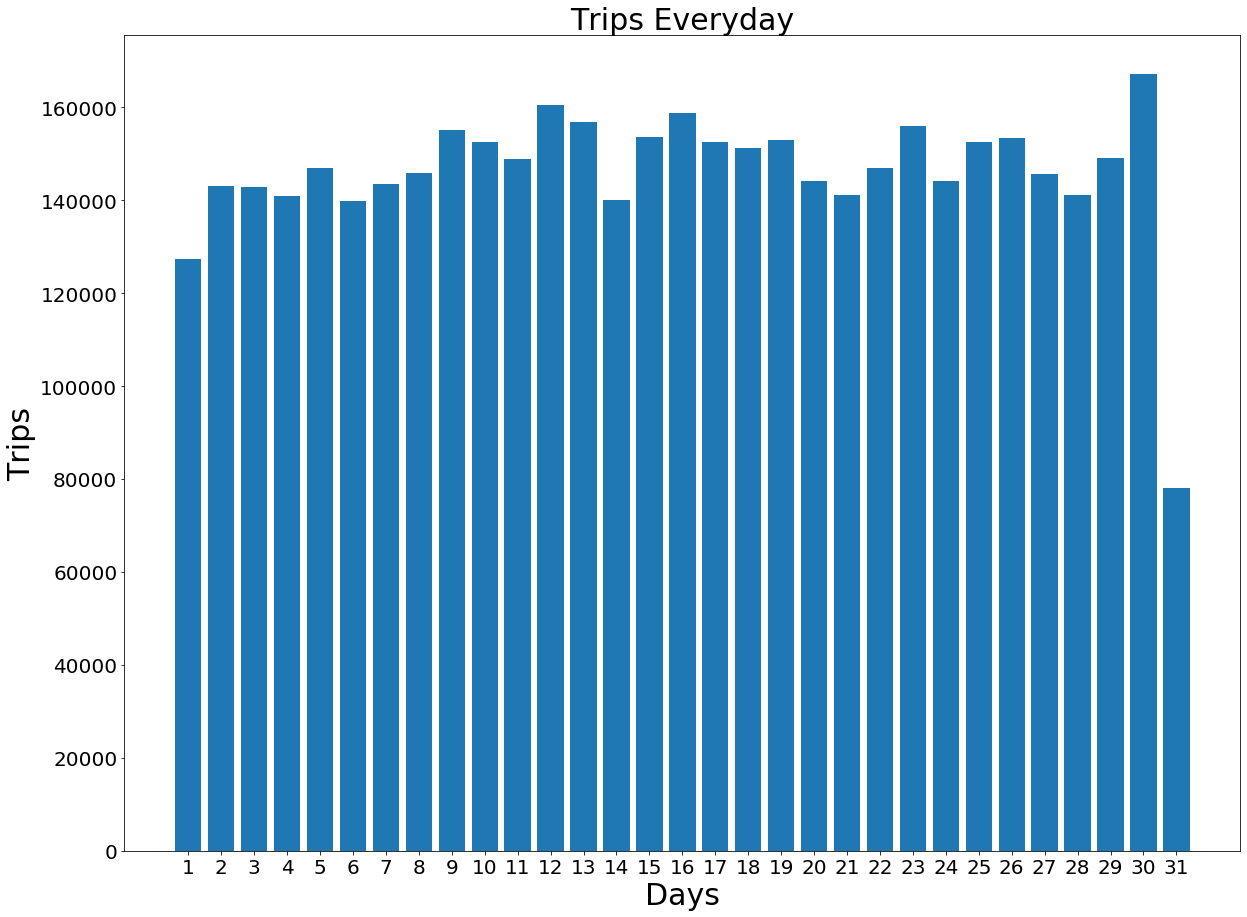

In [33]:
y = [len(final.groupby(['day']).get_group(i)) for i in range(1,32) ]
x = np.array(range(1,32))
plt.figure(figsize=(20,15))
plt.bar(x,y)
plt.xticks(range(1,32),size=20)
plt.yticks(size=20)
plt.xlabel('Days',size=30)
plt.ylabel('Trips',size=30)
plt.title('Trips Everyday',size=30)
plt.show()

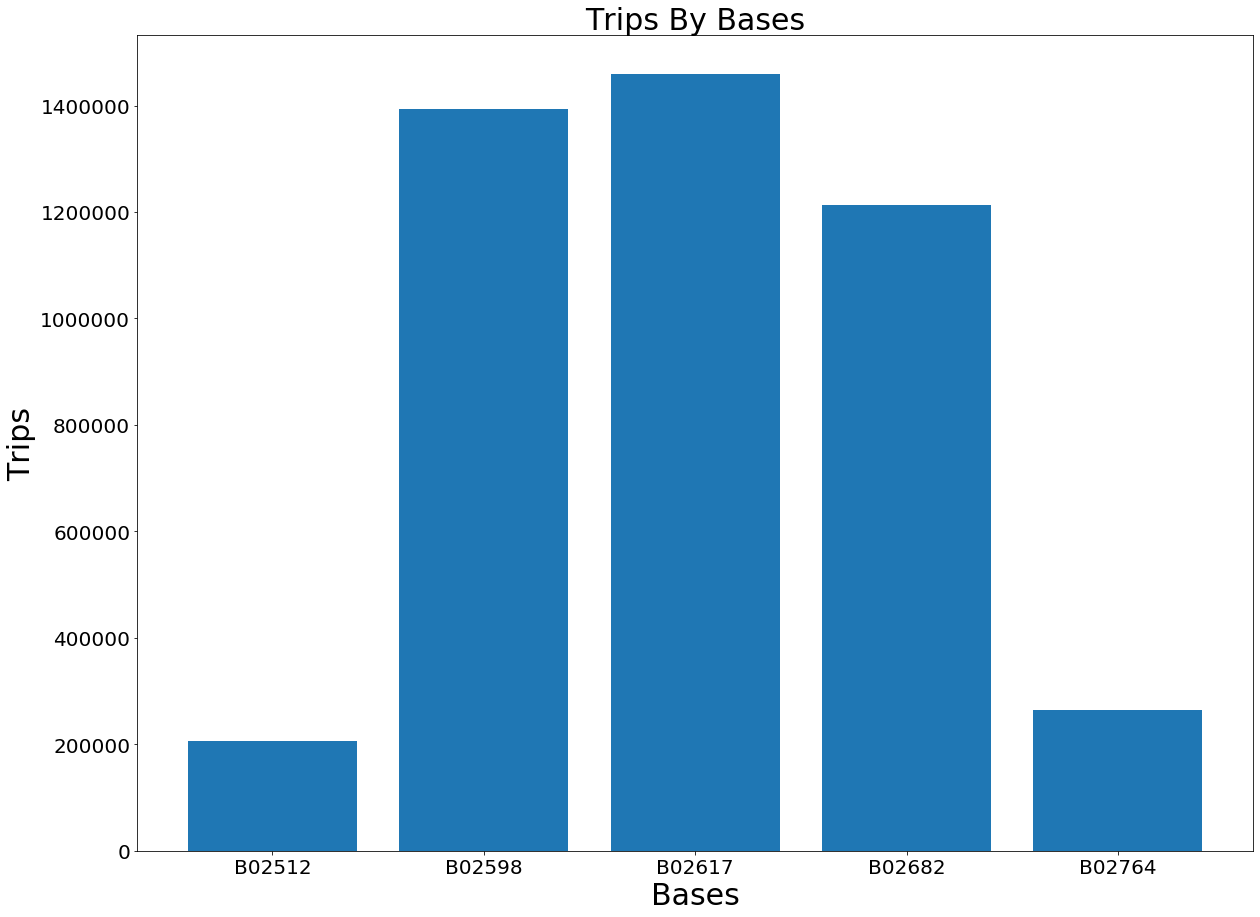

In [34]:
x =np.array(final['Base'])
x1 = np.unique(x)
y = [len(final.groupby(['Base']).get_group(i)) for i in x1 ]

plt.figure(figsize=(20,15))
plt.bar(x1,y)
plt.xlabel('Bases',size=30)
plt.ylabel('Trips',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Trips By Bases',size=30)
plt.show()

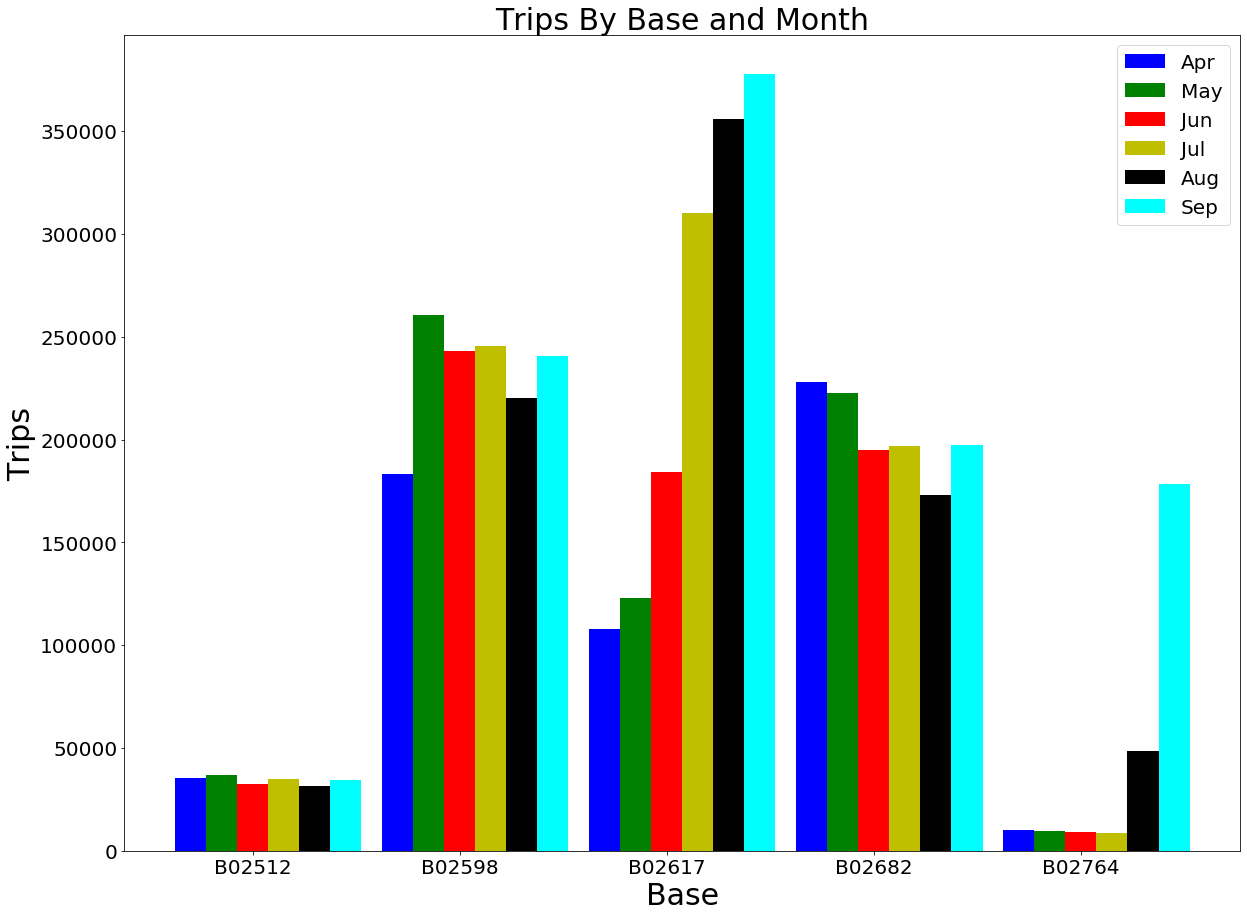

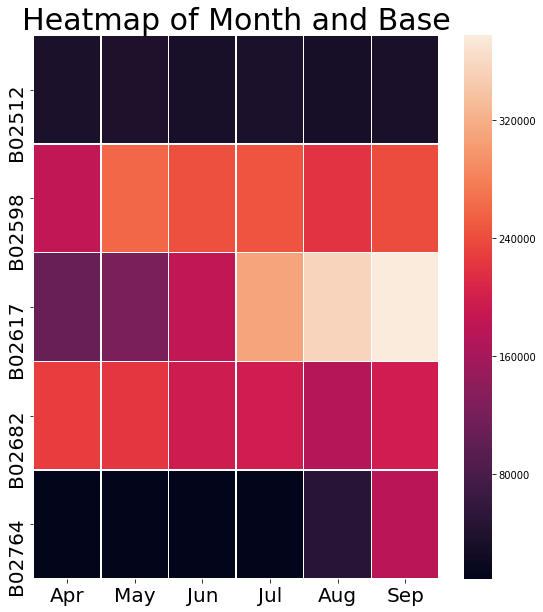

In [35]:
y = [len(final.groupby(['Base']).get_group(i).groupby(['month']).get_group(j)) for i in x1 for j in range(4,10) ]

y = np.reshape(y,(5,6))
x = np.array(range(5))
plt.figure(figsize=(20,15))
plt.bar(x-0.30, y[:,0], width=0.15, color='b', align='center')
plt.bar(x-0.15, y[:,1], width=0.15, color='g', align='center')
plt.bar(x, y[:,2], width=0.15, color='r', align='center')
plt.bar(x+0.15,y[:,3], width=0.15, color='y', align='center')
plt.bar(x+0.30,y[:,4], width=0.15, color='black', align='center')
plt.bar(x+0.45,y[:,5], width=0.15, color='cyan', align='center')
plt.xticks(x,x1,size=20)
plt.xlabel('Base',size=30)
plt.yticks(size=20)
plt.ylabel('Trips',size=30)
plt.legend(['Apr','May','Jun','Jul','Aug','Sep'],ncol = 1,fontsize=20)
plt.title('Trips By Base and Month',size=30)
plt.show()

plt.figure(figsize=(20,10))
ax=plt.subplot(122)
plt.title('Heatmap of Month and Base',size=30)
plt.ylabel('Base',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Month',size=30)

sns.heatmap(y,xticklabels=month, yticklabels=x1,linewidths=.5,ax=ax)
plt.show()

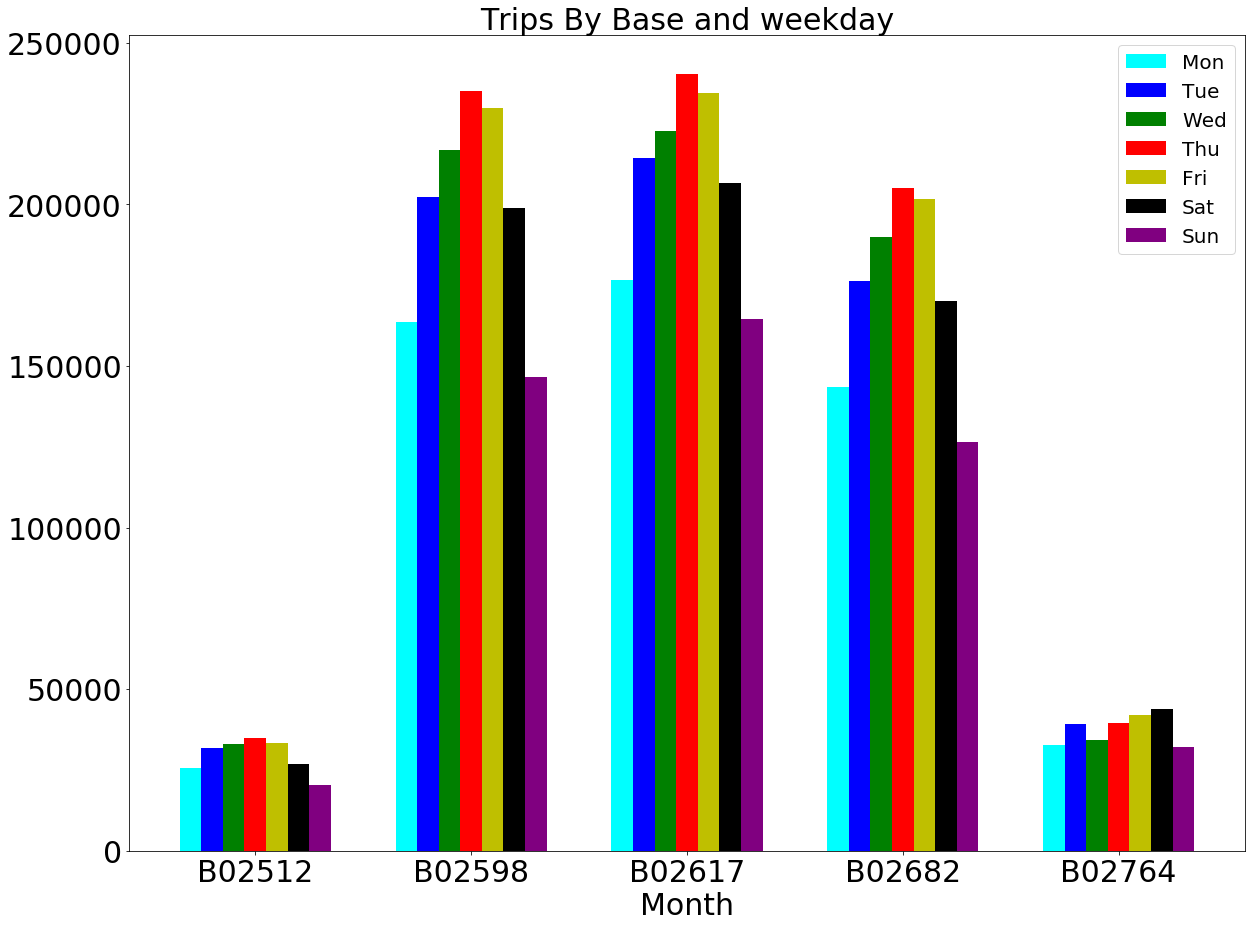

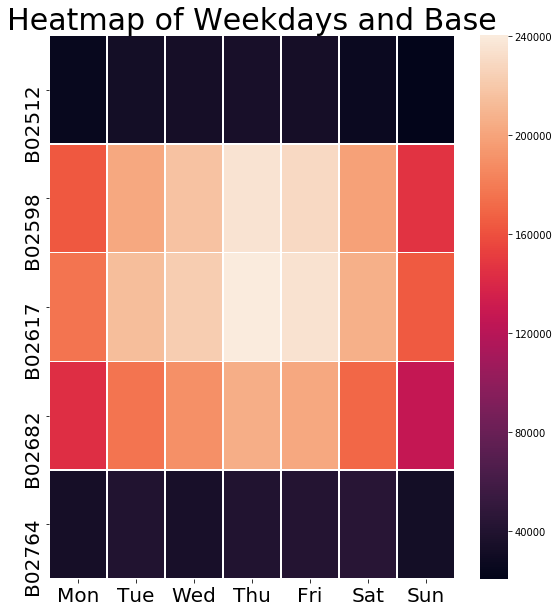

In [36]:
y = [len(final.groupby(['Base']).get_group(i).groupby(['weekday']).get_group(j)) for i in x1 for j in range(7) ]
y = np.reshape(y,(5,7))
x = np.array(range(5))
plt.figure(figsize=(20,15))
plt.bar(x-0.3,y[:,0], width=0.1, color='cyan', align='center')
plt.bar(x-0.2, y[:,1], width=0.1, color='b', align='center')
plt.bar(x-0.1, y[:,2], width=0.1, color='g', align='center')
plt.bar(x, y[:,3], width=0.1, color='r', align='center')
plt.bar(x+0.1,y[:,4], width=0.1, color='y', align='center')
plt.bar(x+0.2,y[:,5], width=0.1, color='black', align='center')
plt.bar(x+0.3,y[:,6], width=0.1, color='purple', align='center')
plt.yticks(size=30)
plt.xticks(x,x1,size=30)
plt.legend(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ncol = 1,fontsize=20)
plt.title('Trips By Base and weekday',size=30)
plt.xlabel('Month',size=30)
plt.show()

plt.figure(figsize=(20,10))
ax=plt.subplot(122)
plt.title('Heatmap of Weekdays and Base',size=30)
plt.ylabel('Base',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Weekday',size=30)

sns.heatmap(y,xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ax=ax,yticklabels=x1,linewidths=.5)